In [ ]:
# Credit Risk Analysis – Exploratory Analysis

## Context
This notebook explores customer credit behavior to identify outstanding debt
and payment delays.

## Objective
Identify customers with high outstanding debt and significant days past due
to support credit risk decisions.

In [ ]:
import pandas as pd
df = pd.read_csv("credit_transactions.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    15 non-null     int64 
 1   customer_id       15 non-null     object
 2   transaction_date  15 non-null     object
 3   total_amount      15 non-null     int64 
 4   paid_amount       15 non-null     int64 
 5   days_past_due     15 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 852.0+ bytes


,0
transaction_id,0
customer_id,0
transaction_date,0
total_amount,0
paid_amount,0
days_past_due,0


In [ ]:
df["outstanding_debt"] = df["total_amount"] - df["paid_amount"]
##Esta métrica permite identificar clientes con deuda activa.
customer_summary = df.groupby("customer_id").agg({
    "total_amount": "sum",
    "paid_amount": "sum",
    "outstanding_debt": "sum",
    "days_past_due": "mean"
}).reset_index()

customer_summary

,customer_id,total_amount,paid_amount,outstanding_debt,days_past_due
0,C001,3300,3300,0,0.0
1,C002,4200,3300,900,22.5
2,C003,5500,1500,4000,75.0
3,C004,2600,2600,0,0.0
4,C005,9000,5500,3500,52.5
5,C006,800,800,0,0.0
6,C007,5000,3800,1200,27.5
7,C008,3500,1000,2500,75.0
8,C009,1800,1800,0,0.0


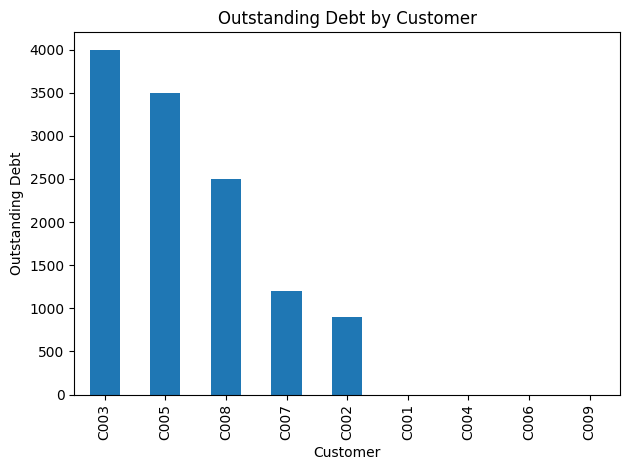

In [ ]:
import matplotlib.pyplot as plt

customer_summary.sort_values("outstanding_debt", ascending=False).plot(
    x="customer_id",
    y="outstanding_debt",
    kind="bar",
    legend=False,
    title="Outstanding Debt by Customer"
)

plt.ylabel("Outstanding Debt")
plt.xlabel("Customer")
plt.tight_layout()
plt.show()


In [ ]:
## Key Insights

- Customers **C003** and **C008** present high outstanding debt.
- These customers also show higher average days past due.
- This pattern indicates an elevated credit risk and should be prioritized
  for monitoring or collection strategies.